In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=sns.load_dataset('iris')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

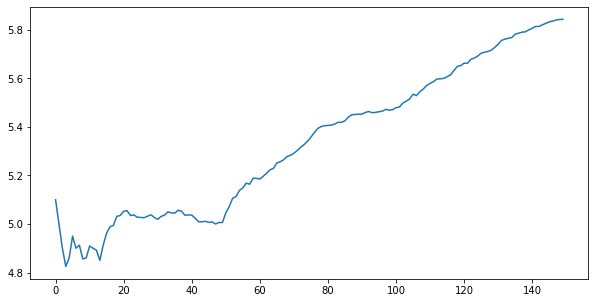

In [7]:
df['sepal_length'].expanding().mean().plot(figsize=(10,5))

<AxesSubplot:>

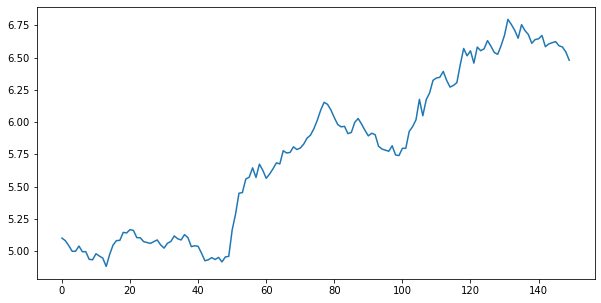

In [8]:
df['sepal_length'].ewm(alpha=.1 , adjust= False).mean ().plot(figsize=(10,5))

<AxesSubplot:>

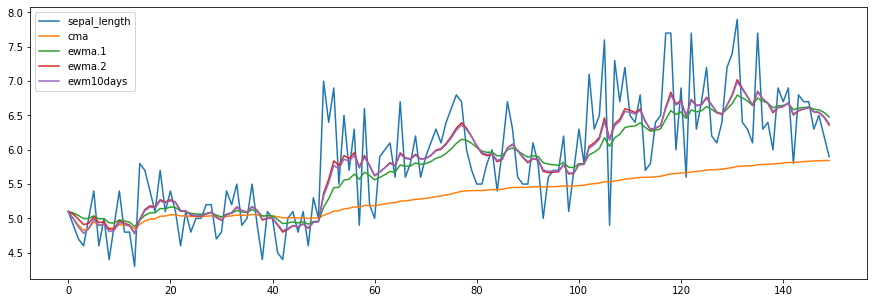

In [11]:
df['cma']=df['sepal_length'].expanding().mean()
df['ewma.1']=df['sepal_length'].ewm(alpha=.1 , adjust= False).mean ()
df['ewma.2']=df['sepal_length'].ewm(alpha=.2, adjust= False).mean ()
df['ewm10days']=df['sepal_length'].ewm(span=10).mean ()
df[['sepal_length','cma','ewma.1','ewma.2','ewm10days']].plot(figsize=(15,5))

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms

%matplotlib inline

df1=pd.read_csv('airline_passengers.csv')

In [13]:
df1.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [15]:
df1.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [16]:
df1.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [17]:
df1.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [18]:
df1.dropna(axis=0,inplace=True)

In [19]:
df1.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [13]:
#object nai hona chiye month ko

In [21]:
df1['Month']=pd.to_datetime(df1['Month'])

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [23]:
df1.set_index('Month',inplace=True)

In [24]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

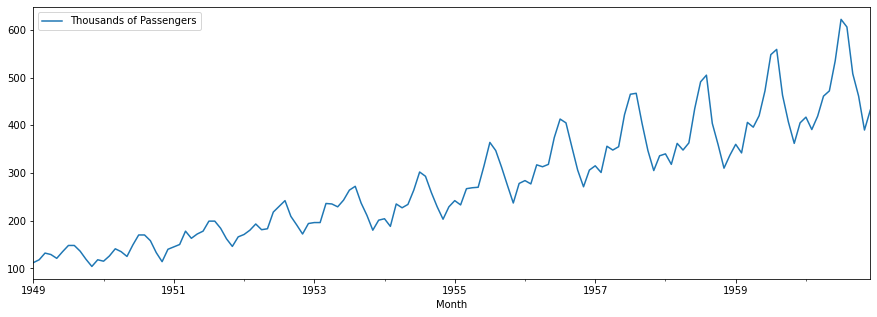

In [25]:
 df1.plot(figsize=(15,5))

#this is a seasonal data

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [28]:
adf_test(df1['Thousands of Passengers'])

ADF Statistics: 0.8153688792060463
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [29]:
## Use Techniques Differencing
df1['Passengers First Difference']=df1['Thousands of Passengers']-df1['Thousands of Passengers'].shift(1)

In [31]:
df1.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [32]:
adf_test(df1['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699857
p- value: 0.05421329028382734
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [33]:
df1['Passengers Second Difference']=df1['Passengers First Difference']-df1['Passengers First Difference'].shift(1)

In [34]:
adf_test(df1['Passengers Second Difference'].dropna())

ADF Statistics: -16.38423154246845
p- value: 2.732891850014516e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [35]:
df1['Passengers 12 Difference']=df1['Thousands of Passengers']-df1['Thousands of Passengers'].shift(12)

In [36]:
adf_test(df1['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

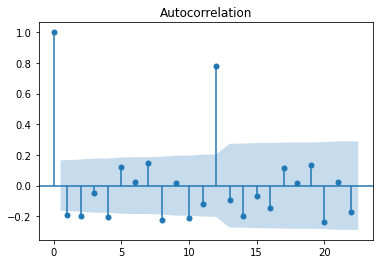

In [42]:
acf2 = plot_acf(df1["Passengers Second Difference"].dropna())

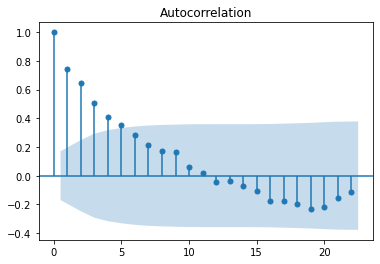

In [43]:
acf12 = plot_acf(df1["Passengers 12 Difference"].dropna())

C:\Users\GAURAV\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


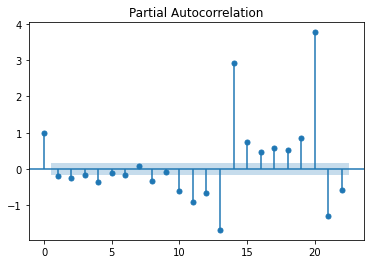

In [44]:
pacf2 = plot_pacf(df1["Passengers Second Difference"].dropna())


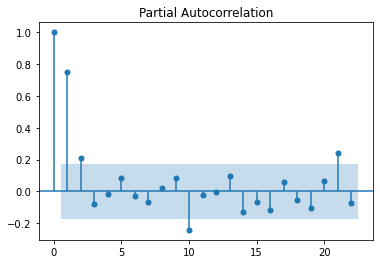

In [46]:
pacf12 = plot_pacf(df1["Passengers 12 Difference"].dropna())


In [47]:
df1

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


<AxesSubplot:ylabel='Month'>

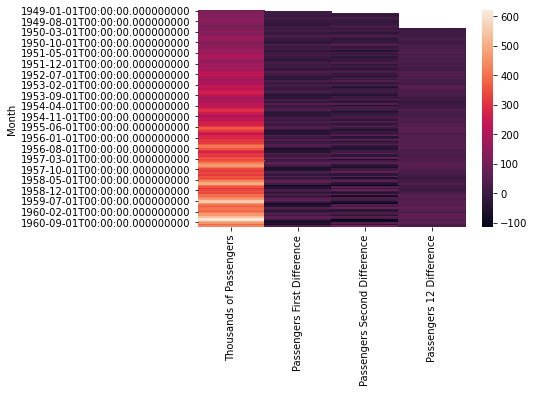

In [48]:
sns.heatmap(df1)

In [49]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [51]:
train_data=df1[:train_dataset_end]
test_data=df1[train_dataset_end+timedelta(days=1):test_dataset_end]

In [52]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [53]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [54]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [55]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [85]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(10,0,6),seasonal_order=(0,1,0,12))

C:\Users\GAURAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\GAURAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [86]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\GAURAV\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\GAURAV\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\GAURAV\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(10, 0, 5)x(0, 1, [], 12)   Log Likelihood                -263.011
Date:                              Mon, 15 May 2023   AIC                            558.022
Time:                                      00:35:57   BIC                            594.449
Sample:                                  01-01-1949   HQIC                           572.524
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1295      0.583     -0.222      0.824      -1.273       1.014
ar.L2         -0.0010      0.563     -0.002      0.999      -1.104       1.102
ar.L3         -0.4349      0.520     -0.836      0.403      -1.454       0.585
ar.L4          0.0844      0.614      0.138      0.891      -1.118       1.287
ar.L5          0.2636      0.587      0.449      0.654      -0.888       1.415
ar.L6          0.5967      0.605      0.986      0.324      -0.589       1.783
ar.L7          0.1329      0.207      0.642      0.521      -0.273       0.539
ar.L8          0.0831      0.197      0.422      0.673      -0.303       0.470
ar.L9          0.3271      0.224      1.459      0.145      -0.112       0.766
ar.L10        -0.0661      0.236     -0.280      0.779      -0.528       0.396
ma.L1          0.9424      0.695      1.355      0.175      -0.420       2.305
ma.L2          0.8937      0.652      1.371      0.170      -0.384       2.171
ma.L3          1.1326      0.782      1.448      0.148      -0.400       2.665
ma.L4          0.8817      0.773      1.140      0.254      -0.634       2.397
ma.L5          0.6894      0.824      0.836      0.403      -0.927       2.305
sigma2        79.9839     55.182      1.449      0.147     -28.172     188.140
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.42
Prob(Q):                              0.87   Prob(JB):                         0.18
Heteroskedasticity (H):               1.96   Skew:                             0.51
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_SARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,460.250704
1960-09-01,508.0,-98.0,-82.0,45.0,422.836525
1960-10-01,461.0,-47.0,51.0,54.0,381.649433
1960-11-01,390.0,-71.0,-24.0,28.0,342.279180
1960-12-01,432.0,42.0,113.0,27.0,380.304404


In [79]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [89]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

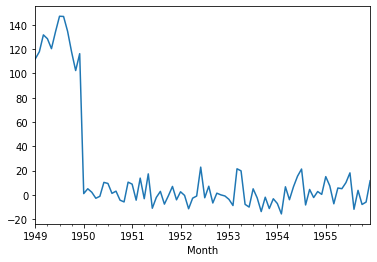

In [90]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

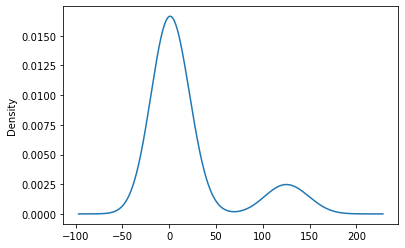

In [91]:
model_SARIMA_fit.resid.plot(kind='kde')

In [92]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-92-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [83]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_SARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,NaN
1956-03-01,317.0,40.0,47.0,50.0,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,NaN
1956-05-01,318.0,5.0,9.0,48.0,NaN
1956-06-01,374.0,56.0,51.0,59.0,NaN
1956-07-01,413.0,39.0,-17.0,49.0,403.399949
1956-08-01,405.0,-8.0,-47.0,58.0,385.073981
1956-09-01,355.0,-50.0,-42.0,43.0,349.446898


<AxesSubplot:xlabel='Month'>

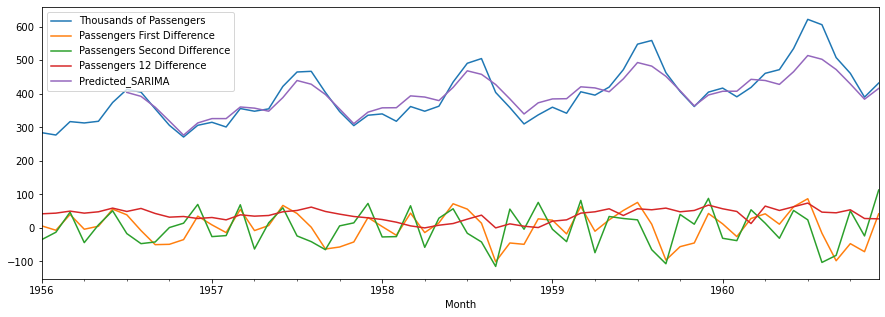

In [93]:
test_data[].plot(figsize=(15,5))


In [95]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

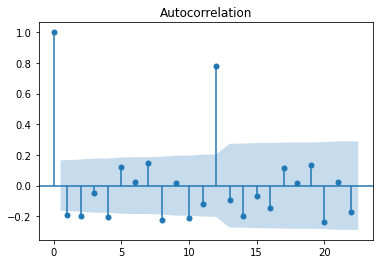

In [105]:
acf2 = plot_acf(df1["Passengers Second Difference"].dropna())

C:\Users\GAURAV\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


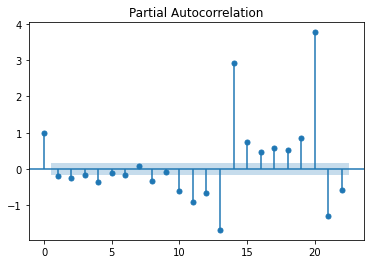

In [104]:
pacf2 = plot_pacf(df1["Passengers Second Difference"].dropna())

In [114]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,3))

C:\Users\GAURAV\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\GAURAV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [115]:
model_Arima_fit=model_ARIMA.fit()

In [116]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 3)   Log Likelihood                -365.549
Method:                               css-mle   S.D. of innovations             20.269
Date:                        Mon, 15 May 2023   AIC                            741.097
Time:                                00:46:05   BIC                            753.131
Sample:                            03-01-1949   HQIC                           745.929
                                 - 12-01-1955                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0056      0.086      0.065      0.948      -0.164       0.175
ma.L1.D2.Thousands of Passengers    -0.7758      0.149     -5.206      0.000      -1.068      -0.484
ma.L2.D2.Thousands of Passengers    -0.5336      0.157     -3.406      0.001      -0.841      -0.226
ma.L3.D2.Thousands of Passengers     0.3094      0.205      1.512      0.130      -0.092       0.710
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4717           +0.0000j            1.4717            0.5000
MA.2            1.0000           +0.0000j            1.0000            0.0000
MA.3            2.1962           +0.0000j            2.1962            0.0000
-----------------------------------------------------------------------------
"""

In [109]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [117]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

<AxesSubplot:ylabel='Density'>

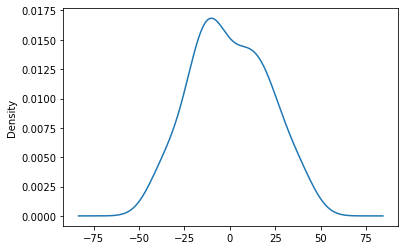

In [118]:
model_Arima_fit.resid.plot(kind='kde')

In [112]:
test_data['Predicted_ARIMA']=pred

<ipython-input-112-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

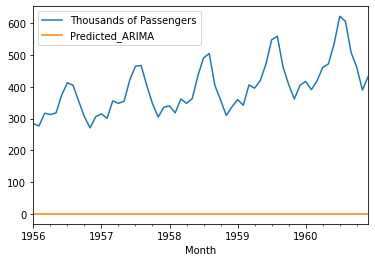

In [119]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()